In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
members = pd.read_csv("members.csv", parse_dates=['MSMTDATE1'], date_parser=dateparse)


expeds = pd.read_csv("exped.csv",parse_dates=['SMTDATE'], date_parser=dateparse)

peaks = pd.read_csv("peaks.csv", low_memory=False)

/Users/elbertwang/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [9]:
deathsbytype = members.groupby(['DEATHTYPE']).size().reset_index(name='counts')

In [4]:
members.loc[(members['PEAKID'] == 'EVER') & (members['MSUCCESS'] == True) & (members['MYEAR'] == 1953)]

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM
22146,EVER53101,6,EVER,1953,1,Edmund Percival,Hillary,M,0,12/30/1899,1919.0,33,New Zealand,Climber,"Auckland, New Zealand",Apiarist & alpinist,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1953-05-29,12/30/1899,12/30/1899,1130.0,NaN,NaN,1,0,0,1,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2420179
22152,EVER53101,14,EVER,1953,1,Tenzing Norgay,NaN,M,0,12/30/1899,1914.0,39,India,Sirdar,"Darjeeling, India",NaN,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,8850,1953-05-29,12/30/1899,12/30/1899,1130.0,NaN,NaN,1,0,0,1,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,48,2418306


In [11]:
members.loc[members['DEATH']==True].groupby(['PEAKID']).size().reset_index(name='counts')

,PEAKID,counts
0,AMAD,28
1,ANN1,71
2,ANN2,6
3,ANN3,9
4,ANN4,5
5,ANNE,1
6,ANNM,3
7,ANNS,8
8,APIM,4
9,BARU,13


In [320]:
members['month'] = members['MSMTDATE1'].dt.strftime('%m')

In [321]:
members['day'] = members['MSMTDATE1'].dt.strftime('%d')

In [15]:
membersbymonthday = members.loc[members['MSMTDATE1']!='1899-12-30 00:00:00'].groupby(['month','day']).size().reset_index(name='counts')

In [310]:
members.loc[members['EXPID'] == 'EVER95305']

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
12276,EVER95305,4,EVER,1995,3,Yong-Il,Jo,M,0,12/30/1899,1968.0,26,S Korea,Climber,"Busan (Pusan), S Korea",Student,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1995-10-14,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,225,0,0,True,False,True,False,True,False,Used sleeping & climbing at & above C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2438143,10,14
12277,EVER95305,2,EVER,1995,3,Ho-Ki,Kang,M,0,12/30/1899,1941.0,54,S Korea,Deputy Leader,"Seoul, S Korea",Flowershop owner,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,19,0,2428042,1899-12-30 00:00:00,1899-12-30 00:00:00
12278,EVER95305,1,EVER,1995,3,Jong-Ho,Kim,M,0,12/30/1899,1955.0,40,S Korea,Leader,"Seoul, S Korea",Computer systems company executive,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,False,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,0,0,0,2433216,1899-12-30 00:00:00,1899-12-30 00:00:00
12279,EVER95305,5,EVER,1995,3,Seok-Bu,Lee,M,0,12/30/1899,1974.0,20,S Korea,Climber,"Chungnam, Jeollabuk, S Korea",Student,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8700,1995-10-09,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,4,10,0,2440374,10,09
12280,EVER95305,6,EVER,1995,3,Young-Il,Lim,M,0,12/30/1899,1968.0,27,S Korea,Climber,"Daejeon (Taejon), S Korea",Student,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,False,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,0,0,0,2437885,1899-12-30 00:00:00,1899-12-30 00:00:00
12281,EVER95305,3,EVER,1995,3,Dong-Seok,Park,M,0,12/30/1899,1965.0,30,S Korea,Deputy Leader,"Seoul, S Korea",Reporter,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,True,12/30/1899,NaN,10,0,Stomach perforation & appendicitis,NaN,NaN,1,9,0,2436876,1899-12-30 00:00:00,1899-12-30 00:00:00
12282,EVER95305,7,EVER,1995,3,Jae-Gyu,Song,M,0,12/30/1899,1964.0,31,S Korea,Climber,"Ulsan, S Korea",Personnel officer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,False,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,0,0,0,2436417,1899-12-30 00:00:00,1899-12-30 00:00:00
12283,EVER95305,8,EVER,1995,3,Shin-Ryul,You,M,0,12/30/1899,1967.0,28,S Korea,Climber,"Seoul, S Korea",Korea University a

In [306]:
members.loc[(members['MSUCCESS'] == True) & (members['DEATH'] == True) & (members['PEAKID'] == "EVER")]

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
8761,EVER79101,32,EVER,1979,1,Ang Phu,Sherpa,M,0,12/30/1899,1950.0,28,Nepal,Sirdar,"Khumjung, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,1979-05-15,12/30/1899,12/30/1899,1430.0,NaN,NaN,1,0,0,33,0,0,True,False,True,False,True,False,NaN,True,05/16/1979,730.0,4,7600,5,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,-2132,05,15
8764,EVER79301,4,EVER,1979,3,Raymond Edward (Ray),Genet,M,0,12/30/1899,1931.0,48,USA,Climber,"Talkeetna, Alaska",Alpine guide,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1979-10-02,12/30/1899,12/30/1899,1300.0,NaN,NaN,1,0,0,35,0,0,True,False,True,False,False,False,NaN,True,10/03/1979,NaN,2,8000,5,True,False,False,12/30/1899,NaN,0,0,Died of exhaustion and exposure in snow cave b...,NaN,NaN,5,1,0,2424431,10,02
8767,EVER79301,6,EVER,1979,3,Hannelore,Schmatz,F,0,12/30/1899,1940.0,39,W Germany,Climber,"Neu-Ulm, Bavaria, W Germany",Housewife,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1979-10-02,12/30/1899,12/30/1899,1300.0,NaN,NaN,1,0,0,35,0,0,True,False,True,False,False,False,NaN,True,10/03/1979,700.0,2,8350,5,False,False,False,12/30/1899,NaN,0,0,Died of exhaustion and exposure on descent (es...,NaN,NaN,5,1,0,2427550,10,02
9045,EVER82402,1,EVER,1982,4,Yasuo,Kato,M,0,12/30/1899,1949.0,33,Japan,Leader,"Omiya, Saitama, Japan",Businessman,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1982-12-27,12/30/1899,12/30/1899,1555.0,NaN,NaN,1,0,0,51,0,0,True,False,True,False,True,False,Used from 7400m upwards,True,12/28/1982,NaN,4,8800,5,False,True,False,12/30/1899,NaN,0,0,Disappeared - blown off by wind?,NaN,NaN,5,1,0,2430985,12,27
9135,EVER83306,3,EVER,1983,3,Hironobu,Kamuro,M,0,12/30/1899,1951.0,31,Japan,Climber,"Oguni, Kumamoto, Japan",Buddhist monk,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1983-10-08,12/30/1899,12/30/1899,1650.0,NaN,NaN,1,0,0,56,0,0,False,True,False,False,False,False,NaN,True,10/08/1983,1800.0,4,8800,5,False,False,False,12/30/1899,NaN,0,0,Fall? (disappeared) (JAC estimates 6 pm),NaN,NaN,5,1,0,2431916,10,08
9136,EVER83306,1,EVER,1983,3,Hiroshi,Yoshino,M,0,12/30/1899,1950.0,33,Japan,Leader,"Tokyo, Japan","Salesman, mountaineering equipment shop",True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1983-10-08,12/30/1899,12/30/1899,1650.0,NaN,NaN,1,0,0,56,0,0,False,True,False,False,False,False,NaN,True,10/09/1983,630.0,4,8800,5,False,False,False,12/30/1899,NaN,0,0,Fall? (disappeared) (JAC estimates 6 am after ...,NaN,NaN,5,1,0,2431300,10,08
9214,EVER84103,3,EVER,1984,1,Christo Ivanov,Prodanov,M,0,12/30/1899,1943.0,41,Bulgaria,Deputy Leader,"Sofia, Bulgaria",Metallurgical engineer,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1984-04-20,12/30/1899,12/30/1899,1815.0,NaN,NaN,1,0,0,59,0,0,False,True,False,False,False,False,NaN,True,04/21/1984,NaN,3,8600,5,False,False,False,12/30/1899,NaN,0,0,Exposure and exhaustion on descent from summit...,NaN,NaN,5,1,0,2428755,04,20
9300,EVER84306,17,EVER,1984,3,Jozef,Psotka,M,0,12/30/1899,193

In [324]:
summitanddiedtime = members.loc[(members['MSUCCESS'] == True) & (members['DEATH'] == True) & (members['PEAKID'] == "EVER") & (members['MSMTTIME1'].notnull())]

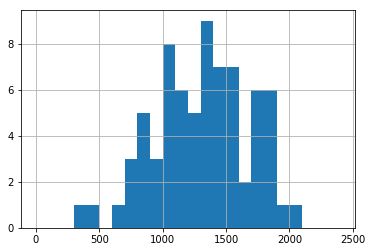

In [246]:
members.loc[(members['MSMTTIME1'].notnull()) & (members['DEATH'] == True) & (members['PEAKID'] == 'EVER')]['MSMTTIME1'].hist(bins=24,range=[0, 2400])

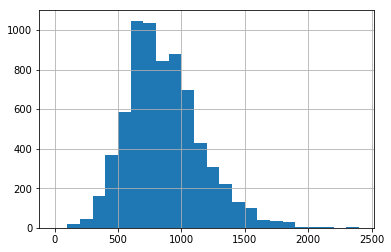

In [202]:
members.loc[(members['MSMTTIME1'].notnull()) & (members['MSUCCESS'] == True) & (members['PEAKID'] == 'EVER')]['MSMTTIME1'].hist(bins=24,range=[0, 2400])

In [214]:
summittimeanddied = members.loc[(members['MSMTTIME1'].notnull()) & (members['DEATH'] == True) & (members['PEAKID'] == 'EVER')]

In [248]:
summittimeanddied.loc[members['MYEAR'] == 1996]

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
12363,EVER96108,6,EVER,1996,1,Bruce,Herrod,M,0,12/30/1899,1958.0,37,UK,Climber,"London, England",Photographer & alpine guide,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-25,12/30/1899,12/30/1899,1700.0,NaN,NaN,1,0,0,245,0,0,True,False,True,False,True,False,NaN,True,05/25/1996,1800.0,4,8750,5,False,False,False,12/30/1899,NaN,0,0,Died at Hillary Step on descent (later found e...,NaN,NaN,5,1,0,2434290,05,25
12391,EVER96110,4,EVER,1996,1,Dorje Morup,NaN,M,0,12/30/1899,1948.0,47,India,Climber,"Skurbucham, Leh, Ladakh, India",ITBP personnel,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,1815.0,NaN,NaN,1,0,0,230,0,0,True,False,True,False,True,False,Above C2 at 7850m,True,05/11/1996,NaN,3,8680,5,False,True,False,12/30/1899,NaN,0,0,Died on descent below Second Step (last seen a...,NaN,NaN,5,1,0,2430756,05,10
12395,EVER96110,5,EVER,1996,1,Tsewang Paljor,NaN,M,0,12/30/1899,1968.0,28,India,Climber,"Sakti, Leh, Ladakh, J&K, India",ITBP personnel,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,1815.0,NaN,NaN,1,0,0,230,0,0,True,False,True,False,True,False,Above C2 at 7850m,True,05/11/1996,NaN,3,8550,5,False,True,False,12/30/1899,NaN,0,0,Died on descent below Second Step (last seen a...,NaN,NaN,5,1,0,2437867,05,10
12412,EVER96110,31,EVER,1996,1,Tsewang,Smanla,M,0,12/30/1899,1957.0,38,India,Climber,"Tia, Leh, Ladakh, J&K, India",ITBP personnel,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,1815.0,NaN,NaN,1,0,0,230,0,0,True,False,True,False,True,False,Above C2 at 7850m,True,05/11/1996,NaN,3,8700,5,False,True,False,12/30/1899,NaN,0,0,Died on descent above Second Step (last seen a...,NaN,NaN,5,1,0,2434017,05,10
12465,EVER96115,10,EVER,1996,1,Yasuko,Namba,F,0,12/30/1899,1949.0,47,Japan,Climber,"Tokyo, Japan",Federal Express,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,300.0,NaN,NaN,1,0,0,228,0,0,True,False,True,False,True,False,In & above C4,True,05/11/1996,300.0,3,7900,5,False,True,False,12/30/1899,NaN,0,0,Died at S Col during early morning hours of 11...,NaN,NaN,5,1,0,2430884,05,10


In [235]:
summittimeandsuccess = members.loc[(members['MSMTTIME1'].notnull()) & (members['MSUCCESS'] == True)  & (members['PEAKID'] == 'EVER') & (members['DEATH'] == False)]

In [27]:
peaks['PYEAR']= peaks['PYEAR'].fillna(0).astype(int).astype(str)
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN


In [29]:
peaks['firstsummitdate'] =  pd.to_datetime(peaks['PSMTDATE'] + " " + peaks['PYEAR'], format='%b %d %Y', errors='ignore')

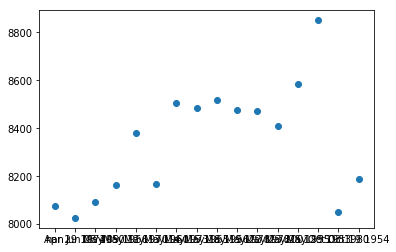

In [31]:
plt.scatter(peaks['firstsummitdate'].loc[peaks['HEIGHTM']>8000].tolist(), peaks['HEIGHTM'].loc[peaks['HEIGHTM']>8000])
plt.show()

In [33]:
unclimbed = peaks.loc[peaks['PSTATUS'] == 1]

In [34]:
climbed = peaks.loc[peaks['PSTATUS'] == 2]

In [38]:
climbed = peaks.loc[peaks['PSTATUS'] == 2]

In [39]:
peaks['firstsummitdate'] = pd.to_datetime(peaks['PSMTDATE'] + " " + peaks['PYEAR'], format='%b %d %Y', exact=False, errors='ignore')

In [43]:
datetime.strptime('Jun 03 1950', '%b %d %Y')

datetime.datetime(1950, 6, 3, 0, 0)

In [47]:
merged = expeds.merge(peaks, how='left', on="PEAKID")

In [49]:
merged['expeddate'] = pd.to_datetime(merged['SMTDATE'], '%Y-%m-%d')

In [50]:
merged = merged[pd.notnull(merged['SMTDATE'])]
merged['PYEAR'] = merged['PYEAR'].astype(int).astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9609 entries, 0 to 9608
Data columns (total 92 columns):
EXPID              9609 non-null object
PEAKID             9609 non-null object
YEAR               9609 non-null int64
SEASON             9609 non-null int64
HOST               9609 non-null int64
ROUTE1             9480 non-null object
ROUTE2             302 non-null object
ROUTE3             30 non-null object
ROUTE4             5 non-null object
NATION             9609 non-null object
LEADERS            9583 non-null object
SPONSOR            8785 non-null object
SUCCESS1           9609 non-null bool
SUCCESS2           9609 non-null bool
SUCCESS3           9609 non-null bool
SUCCESS4           9609 non-null bool
ASCENT1            2680 non-null object
ASCENT2            100 non-null object
ASCENT3            11 non-null object
ASCENT4            4 non-null object
CLAIMED            9609 non-null bool
DISPUTED           9609 non-null bool
COUNTRIES          3073 non-null object


In [51]:
merged['firstsummitdate'] = pd.to_datetime(merged['PSMTDATE'] + " " + merged['PYEAR'],errors="coerce")

In [53]:
beforesummit = merged.loc[merged['HEIGHTM'] > 8000].loc[((merged['expeddate'] <= merged['firstsummitdate']) & (merged['expeddate'] != datetime.strptime('1899-12-30 00:00:00', '%Y-%m-%d %H:%M:%S')))  | (merged['YEAR'] < merged['PYEAR'].astype(int))] 

In [58]:
geocodedpeaks = pd.read_csv('geocodedpeaks.csv')

In [60]:
geocodedpeaks = geocodedpeaks.rename(columns = {'input_string':'PKNAME'})

In [62]:
mergedpeaks = peaks.merge(geocodedpeaks)

In [63]:
peaks.shape

(457, 26)

In [65]:
gpf = pd.read_csv("geocodedpeaksfinal.csv")

In [69]:
eightthousanders = peaks.loc[peaks['HEIGHTM'] > 8000]['PEAKID']

In [70]:
expeds.shape

(9609, 66)

In [72]:
eightthousandermembers = members[members['PEAKID'].isin(eightthousanders)]

In [74]:
eightthousandermembers.loc[(eightthousandermembers['MSUCCESS'] == True) | (eightthousandermembers['DEATH'] == True)]

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
1369,ANN170101,2,ANN1,1970,1,Donald Desbrow (Don),Whillans,M,0,12/30/1899,1933.0,37,UK,Deputy Leader,"Rossendale, Lancashire, England","Plumber, lecturer & alpinist",False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8091,1970-05-27,12/30/1899,12/30/1899,1430.0,NaN,NaN,1,0,0,3,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2425276,05,27
1372,ANN170101,5,ANN1,1970,1,Ian Stewart,Clough,M,0,12/30/1899,1937.0,32,UK,Climber,"Glencoe, Argyll, Scotland",Director of Glencoe School of Mountaineering,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7315,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,True,05/30/1970,945.0,8,5300,6,False,False,False,12/30/1899,NaN,0,0,Killed by falling serac just below C2 shortly ...,NaN,NaN,1,15,0,-1939,1899-12-30 00:00:00,1899-12-30 00:00:00
1375,ANN170101,10,ANN1,1970,1,Dougal,Haston,M,0,12/30/1899,1942.0,28,UK,Climber,"Leysin, Vaud, Switzerland",Director of International School of Mountainee...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8091,1970-05-27,12/30/1899,12/30/1899,1430.0,NaN,NaN,1,0,0,3,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2428525,05,27
1383,ANN170102,2,ANN1,1970,1,M. W. Henry,Day,M,0,12/30/1899,1942.0,28,UK,Climbing Leader,"Knutsford, Cheshire, England",Captain,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8091,1970-05-20,12/30/1899,12/30/1899,1100.0,NaN,NaN,1,0,0,2,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2428515,05,20
1384,ANN170102,9,ANN1,1970,1,Gerald F. (Gerry),Owens,M,0,12/30/1899,1937.0,32,UK,Climber,"Malton, N Yorkshire, England","Infantry Training Centre, Royal Marines, Devon...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8091,1970-05-20,12/30/1899,12/30/1899,1100.0,NaN,NaN,1,0,0,2,0,0,True,False,True,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2426960,05,20
1400,ANN173101,9,ANN1,1973,1,Sadatoshi,Takahashi,M,0,12/30/1899,NaN,37,Japan,Climber,"Matsumoto, Nagano, Japan","Assistant manager, Nagano Mitsubishi Electric ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,True,05/18/1973,1130.0,7,6700,6,False,False,False,12/30/1899,NaN,0,0,Avalanche between C3 and C4,NaN,NaN,0,0,0,-62,1899-12-30 00:00:00,1899-12-30 00:00:00
1401,ANN173101,4,ANN1,1973,1,Masanori,Hama,M,0,12/30/1899,NaN,36,Japan,Climber,"Suwa, Nagano, Japan","Assistant manager, Suwa Seikosha Co. (watches)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,True,05/18/1973,1130.0,7,6700,6,False,False,False,12/30/1899,NaN,0,0,Avala

In [76]:
members.loc[members['RESIDENCE'].notnull()].shape

(64668, 76)

In [77]:
members.shape

(70133, 76)

In [78]:
members.loc[members['RESIDENCE'].notnull()].shape

(64668, 76)

In [79]:
geocodedresidences = pd.read_csv('geocodedmembers.csv')

In [92]:
geocodedresidences = geocodedresidences.rename(columns = {'RESIDENCE':'input_string'})

In [83]:
geocodedresidences.head()

,Unnamed: 0,accuracy,formatted_address,google_place_id,RESIDENCE,latitude,longitude,number_of_results,postcode,status,type
0,0,APPROXIMATE,"Argentière, 74400 Chamonix, France",ChIJn9yry7xMiUcRKy3DvNdKSSc,"Argentiere, Haute-Savoie, France",45.983986,6.926873,1,74400,OK,"political,sublocality,sublocality_level_1"
1,1,APPROXIMATE,"74310 Les Houches, France",ChIJI3AKp1JQiUcRcJ665CqrCAQ,"Les Houches, Haute-Savoie, France",45.890388,6.798735,1,74310,OK,"locality,political"
2,2,GEOMETRIC_CENTER,"Route de Troyes, 51120 Sézanne, France",ChIJfxmlQ28y6UcRmmPMtYAxKVs,"Troyes, Val-de-Marne, France",48.709951,3.732658,1,51120,OK,route
3,3,APPROXIMATE,"74400 Chamonix, France",ChIJ5y7-LQZMiUcRgKO65CqrCAQ,"Chamonix, Haute-Savoie, France",45.923697,6.869433,1,74400,OK,"locality,political"
4,4,APPROXIMATE,"74310 Les Houches, France",ChIJI3AKp1JQiUcRcJ665CqrCAQ,"Les Houches, Haute-Savoie, France",45.890388,6.798735,1,74310,OK,"locality,political"


In [84]:
mergedmembers = members[:1000].merge(geocodedresidences, how='left', on="RESIDENCE")

In [89]:
first1000members = members[:1000]

In [159]:
first1000members.head()

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
0,AMAD78301,1,AMAD,1978,3,Jean Robert,Clemenson,M,0,12/30/1899,1938.0,40,France,Leader,"Argentiere, Haute-Savoie, France",Alpine guide,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426937,1899-12-30 00:00:00,1899-12-30 00:00:00
1,AMAD78301,2,AMAD,1978,3,Bernard,Dufour,M,0,12/30/1899,1936.0,41,France,Deputy Leader,"Les Houches, Haute-Savoie, France",Alpine guide,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,1978-10-21,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426501,10,21
2,AMAD78301,3,AMAD,1978,3,Philippe,Gerard,M,0,12/30/1899,1950.0,27,France,Climber,"Troyes, Val-de-Marne, France",Professional photographer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2431569,1899-12-30 00:00:00,1899-12-30 00:00:00
3,AMAD78301,4,AMAD,1978,3,Eric,Lasserre,M,0,12/30/1899,1937.0,40,France,Exp Doctor,"Chamonix, Haute-Savoie, France",Physician,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,1978-10-21,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426809,10,21
4,AMAD78301,5,AMAD,1978,3,Guy,Peters,M,0,12/30/1899,1944.0,34,France,Climber,"Les Houches, Haute-Savoie, France",Alpine guide,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2429215,1899-12-30 00:00:00,1899-12-30 00:00:00


In [90]:
members.loc[members['PEAKID'] == 'EVER'].shape

(19554, 76)

In [93]:
mergedmembers = first1000members.join(geocodedresidences)

In [95]:
mergedmembers.shape

(1000, 87)

In [97]:
everestmembers = members.loc[members['PEAKID'] == 'EVER']

In [98]:
everestmembers.shape

(19554, 76)

In [102]:
successmembers = members.loc[(members['MSUCCESS'] == True) & (members['PEAKID'] == 'EVER')]

In [103]:
successmembers.shape

(8219, 76)

In [104]:
members.shape

(70133, 76)

In [111]:
successmembers['MYEAR'].min()

1953

In [194]:
everestbymonthday = members.loc[(members['MSMTDATE1']!='1899-12-30 00:00:00') & (members['PEAKID'] == 'EVER')].groupby(['month','day']).size().reset_index(name='counts')

In [243]:
shrunk = toshrink.filter(items=['PKNAME', 'LOCATION', 'HEIGHTM', 'HIMAL', 'PYEAR', 'PSUMMITERS', 'firstsummitdate', 'latitude', 'longitude'])

In [43]:
len(members['OCCUPATION'].unique())

14237

In [40]:
occupationcount = members['OCCUPATION'].value_counts()

In [42]:
occupationcount.to_csv('occupationcount.csv')

In [263]:
expeds['hiredratio'] = expeds['TOTHIRED'] / expeds['TOTMEMBERS'] 

In [280]:
successexpeds = expeds.loc[(expeds['SUCCESS1'] == True) & (expeds['PEAKID'] == 'EVER') & (expeds['AGENCY'].notnull())]

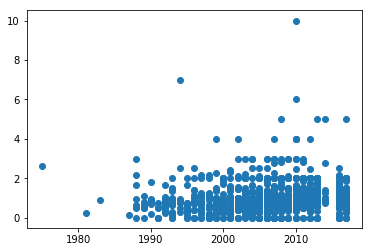

In [283]:
plt.scatter(successexpeds['YEAR'], successexpeds['hiredratio'])

In [8]:
expeds.loc[(expeds['YEAR'] == 1963) & (expeds['PEAKID'] == 'EVER')]

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
2544,EVER63101,EVER,1963,1,1,S Col-SE Ridge,W Cwm-W Ridge-N Face up; SE Ridge-S Col down,NaN,NaN,USA,Norman Dyhrenfurth,American Mount Everest Expedition 1963,True,True,False,False,"5th,6th",7th,NaN,NaN,False,False,UK,Khumbu Valley,03/21/1963,1963-05-01,1300.0,41,65,05/25/1963,1,NaN,8850,True,False,False,6,0,20,5,1,40,1,0,False,True,False,True,False,True,False,False,False,NaN,"BC(21/03,5425m),C1(30/03,6160m),C2.ABC(02/04,6...",NaN,Breitenbach killed in Khumbu Icefall,NaN,NaN,False,False,False,False,False,NaN,2440204


In [15]:
route2unique = expeds.loc[(expeds['PEAKID'] == 'EVER') & (expeds['SUCCESS1'] == True)]['ROUTE2'].unique()

In [16]:
route1unique = expeds.loc[(expeds['PEAKID'] == 'EVER') & (expeds['SUCCESS1'] == True)]['ROUTE1'].unique()

In [18]:
pd.Series(list(set(route1unique) & set(route2unique)))

0    S Col-SE Ridge (up); N Col-NE Ridge (down)
1                                N Col-NE Ridge
2    N Col-NE Ridge (up); S Col-SE Ridge (down)
3                                 N Col-N Ridge
4                                      NE Ridge
5         N Face (Japanese & Hornbein Couloirs)
dtype: object

In [34]:
expeds.loc[(expeds['PEAKID'] == 'EVER') & (expeds['SUCCESS1'] == True)].groupby(['ROUTE1']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,ROUTE1,counts
29,S Col-SE Ridge,658
16,N Col-NE Ridge,300
11,N Col-N Ridge,85
8,N Col-N Face,23
20,N Col-NE-Ridge,17
14,N Col-N Ridge-N Face,12
34,S Pillar-SE Ridge,5
32,S Pillar,3
24,N Face (Japanese & Hornbein Couloirs),3
23,N Face (Great Couloir),2


In [32]:
expeds.loc[expeds.loc[(expeds['PEAKID'] == 'EVER') & (expeds['SUCCESS1'] == True)].groupby(['ROUTE2'])['YEAR'].idxmin()].sort_values(by=['YEAR'])

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
2544,EVER63101,EVER,1963,1,1,W Ridge-N Face (Hornbein Couloir),W Cwm-W Ridge-N Face up; SE Ridge-S Col down,NaN,NaN,USA,Norman Dyhrenfurth,American Mount Everest Expedition 1963,True,True,False,False,"5th,6th",7th,NaN,NaN,False,False,UK,Khumbu Valley,03/21/1963,1963-05-01,1300.0,41,65,05/25/1963,1,NaN,8850,True,False,False,6,0,20,5,1,40,1,0,False,True,False,True,False,True,False,False,False,NaN,"BC(21/03,5425m),C1(30/03,6160m),C2.ABC(02/04,6...",NaN,Breitenbach killed in Khumbu Icefall,NaN,NaN,False,False,False,False,False,NaN,2440204
2347,EVER73301,EVER,1973,3,1,S Col-SE Ridge,SW Face (to 8380m),NaN,NaN,Japan,Michio Yuasa,Japanese Expedition to Mt Everest 1973,True,False,False,False,16th,NaN,NaN,NaN,False,False,NaN,Khumbu Valley,08/25/1973,1973-10-26,1630.0,62,0,12/30/1899,1,NaN,8850,False,False,False,5,0,49,2,0,33,0,1,False,True,False,True,False,False,False,False,False,NaN,"BC(25/08,5440m),C1(04/09,6100m),C2(09/09,6700m...",NaN,Zangbu Sherpa killed by avalanche between C2 a...,NaN,NaN,False,False,False,False,False,NaN,2444045
1927,EVER80103,EVER,1980,1,2,N Face (Japanese & Hornbein Couloirs),N Face (Japanese & Hornbein Couloirs),NaN,NaN,Japan,Hyoriki Watanabe,Japanese Alpine Club (JAC),True,True,False,False,37th,38th,NaN,NaN,False,False,NaN,Lhasa->BC,03/05/1980,1980-05-03,1655.0,59,0,12/30/1899,1,NaN,8850,False,False,False,7,0,27,3,1,22,0,0,False,True,False,True,False,True,False,False,False,NaN,"Smt(03,10/05) (See Route Details)",NaN,Akira Ube died in avalanche,NaN,NaN,False,False,False,False,False,NaN,2446433
504,EVER84103,EVER,1984,1,1,Lho La-W Ridge,Lho La-W Ridge up; SE Ridge-S Col down,NaN,NaN,Bulgaria,Avram Iliev Avramov,Avram Iliev Avramov Spring 1984 Everest Expedi...,True,True,False,False,59th,"60th,61st",NaN,NaN,False,False,NaN,NaN,03/18/1984,1984-04-20,1815.0,33,52,05/09/1984,1,NaN,8850,True,False,False,5,0,24,5,1,9,0,0,False,True,False,True,False,False,False,False,False,NaN,"BC(18/03,5350m),C1(21/03,6050m),C2(27/03,6770m...",NaN,Prodanov death at 8600m; Yankov frostbitten fi...,NaN,NaN,False,False,False,False,False,NaN,2447930
512,EVER88101,EVER,1988,1,2,"N Col-N Ridge up, SE Ridge-S Col down",N Col-N Ridge,"S Col-SE Ridge up, N Ridge-N Col down",S Col-SE Ridge,China,"Shi Zhang-Chun, Toshio Imanishi, Kumar Khadga ...",China-Japan-Nepal Friendship Expedition to Qom...,True,True,True,True,76th,76th,77th,78th,False,False,"Japan, Nepal",Lukla->Khumbu Valley,03/06/1988,1988-05-05,925.0,60,73,05/18/1988,1,NaN,8850,True,False,False,7,0,99,14,1,99,0,0,False,True,False,True,False,True,False,False,False,NaN,See Route Details,NaN,"No accidents, frostbite or serious illness exc...",NaN,NaN,False,False,False,False,False,NaN,2449410
791,EVER91104,EVER,1991,1,2,N Col-N Ridge-N Face,NE Ridge,NaN,NaN,USA,Eric Simonson,International Mountain Guides (IMG) Everest N ...,True,False,False,False,"117,120,123,125",NaN,NaN,NaN,False,False,"Australia, New Zealand",KTM->Tingri->Rongbuk BC,03/13/1991,1991-05-15,1230.0,63,76,05/28/1991,1,NaN,8850,False,False,False,6,0,22,8,0,12,2,0,False,True,False,True,False,False,False,False,False,NaN,"BC(13/03,5150m),C119/03,5500m),C2(20/03,6100m)...",NaN,None,NaN,Mountain Travel,False,False,False,False,False,NaN,2450563
602,EVER91311,EVER,1991,3,1,S Col-SE Ridge,W Cwm-W Ridge (to 8100m+),NaN,NaN,USSR,Vladamir Balyberdin,Himalaya 1991 Expedition of USSR - to Everest,True,False,False,False,"128,129",NaN,NaN,NaN,False,False,"Ukraine, USA",NaN,09/17/1991,1991-10-07,1500.0,20,0,12/

In [35]:
routefirsts = expeds.loc[expeds.loc[(expeds['PEAKID'] == 'EVER') & (expeds['SUCCESS1'] == True)].groupby(['ROUTE1'])['YEAR'].idxmin()].sort_values(by=['YEAR'])

In [394]:
expeds.head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
0,ANN260101,ANN2,1960,1,1,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,03/15/1960,1960-05-17,1530.0,63,0,12/30/1899,1,NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m)...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2442047
1,ANN269301,ANN2,1969,3,1,NW Ridge-W Ridge,NaN,NaN,NaN,Yugoslavia,Ales Kunaver,Mountaineering Club of Slovenia,True,False,False,False,2nd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Hongde->Sabje Khola,09/25/1969,1969-10-22,1800.0,27,31,10/26/1969,1,NaN,7937,False,False,False,6,0,10,2,0,0,0,0,False,False,True,False,False,False,False,False,False,Climbed Annapurna IV (ANN4-693-02),"LowBC(25/09,3950m),BC(27/09,4650m),C1(27/09,53...",NaN,Draslar frostbitten hands and feet,NaN,NaN,False,False,False,False,False,NaN,2445501
2,ANN273101,ANN2,1973,1,1,W Ridge-N Face,NaN,NaN,NaN,Japan,Yukio Shimamura,Sangaku Doshikai Annapurna II Expedition 1973,True,False,False,False,3rd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,03/16/1973,1973-05-06,2030.0,51,0,12/30/1899,1,NaN,7937,False,False,False,5,0,6,1,0,8,0,0,False,False,True,False,False,False,False,False,False,NaN,"BC(16/03,3300m),C1(21/03,4200m),C2(10/04,5000m...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2446797
3,ANN278301,ANN2,1978,3,1,N Face-W Ridge,NaN,NaN,NaN,UK,Richard J. Isherwood,British Annapurna II Expedition,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,09/08/1978,1978-10-02,NaN,24,27,10/05/1978,4,Abandoned at 7000m (on A-IV) due to bad weather,7000,False,False,False,0,0,2,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(08/09,5190m),xxx(02/10,7000m)",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2448822
4,ANN279301,ANN2,1979,3,1,N Face-W Ridge,NW Ridge of A-IV,NaN,NaN,UK,Paul Moores,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Pokhara->Marshyangdi->Pisang->Sabje Khola,12/30/1899,1979-10-18,NaN,0,0,10/20/1979,4,Abandoned at 7160m due to high winds,7160,False,False,False,0,0,3,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(3500m),ABC,Biv1,Biv2,Biv3,Biv4,Biv5,xxx(18/...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2449204


In [36]:
routefirsts.to_csv('routefirsts.csv')

In [12]:
expeds.loc[(expeds['PEAKID'] == 'EVER') & (expeds['SUCCESS1'] == True)]['ROUTE1'].unique()

array(['W Ridge-N Face (Hornbein Couloir)',
       'N Face (Japanese & Hornbein Couloirs)', 'S Col-SE Ridge',
       'Eastern most buttress of E Face', 'S Pillar-SE Ridge',
       'Lho La-W Ridge from S',
       'Khumbutse-W Ridge-N Face (Hornbein Couloir)',
       'SW Face up; SE Ridge-S Col down',
       'S Pillar up; SE Ridge-S Col down', 'Lho La-W Ridge',
       'N Face (Great Couloir)', 'N Col-N Ridge up, SE Ridge-S Col down',
       'N Col-N Ridge', 'N Col-N Ridge-N Face', 'N Col-N Face/N Ridge',
       'E Face-S Col-SE Ridge', 'S Couloir/S Pillar', 'N Col-N Face',
       'S Pillar', 'NE Ridge',
       'N Col-N Ridge-N Face up; Great Couloir down',
       'N Col-N Ridge up; SE Ridge-S Col down',
       'N Col-N Face (Great Couloir)', 'SW Face (Bonington rte)', 'E Face',
       'SW Face rib-W Ridge',
       'S Plr-S Col-SE Ridge up; S Col-Lhot W Face down',
       'NE Ridge-N Ridge-N Face up; N Ridge-N Col down',
       'Lho La-W Ridge up; N Face (Hornbein)-W Ridge down',
       '

In [376]:
pt3joined = pt3.join(pt3geocoded)

In [388]:
expeds.head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
0,ANN260101,ANN2,1960,1,1,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,03/15/1960,1960-05-17,1530.0,63,0,12/30/1899,1,NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m)...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2442047
1,ANN269301,ANN2,1969,3,1,NW Ridge-W Ridge,NaN,NaN,NaN,Yugoslavia,Ales Kunaver,Mountaineering Club of Slovenia,True,False,False,False,2nd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Hongde->Sabje Khola,09/25/1969,1969-10-22,1800.0,27,31,10/26/1969,1,NaN,7937,False,False,False,6,0,10,2,0,0,0,0,False,False,True,False,False,False,False,False,False,Climbed Annapurna IV (ANN4-693-02),"LowBC(25/09,3950m),BC(27/09,4650m),C1(27/09,53...",NaN,Draslar frostbitten hands and feet,NaN,NaN,False,False,False,False,False,NaN,2445501
2,ANN273101,ANN2,1973,1,1,W Ridge-N Face,NaN,NaN,NaN,Japan,Yukio Shimamura,Sangaku Doshikai Annapurna II Expedition 1973,True,False,False,False,3rd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,03/16/1973,1973-05-06,2030.0,51,0,12/30/1899,1,NaN,7937,False,False,False,5,0,6,1,0,8,0,0,False,False,True,False,False,False,False,False,False,NaN,"BC(16/03,3300m),C1(21/03,4200m),C2(10/04,5000m...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2446797
3,ANN278301,ANN2,1978,3,1,N Face-W Ridge,NaN,NaN,NaN,UK,Richard J. Isherwood,British Annapurna II Expedition,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,09/08/1978,1978-10-02,NaN,24,27,10/05/1978,4,Abandoned at 7000m (on A-IV) due to bad weather,7000,False,False,False,0,0,2,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(08/09,5190m),xxx(02/10,7000m)",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2448822
4,ANN279301,ANN2,1979,3,1,N Face-W Ridge,NW Ridge of A-IV,NaN,NaN,UK,Paul Moores,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Pokhara->Marshyangdi->Pisang->Sabje Khola,12/30/1899,1979-10-18,NaN,0,0,10/20/1979,4,Abandoned at 7160m due to high winds,7160,False,False,False,0,0,3,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(3500m),ABC,Biv1,Biv2,Biv3,Biv4,Biv5,xxx(18/...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2449204


In [377]:
pt3joined.head()

,Unnamed: 0,index,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day,index1,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type
0,4400,48542,EVER09168,53,EVER,2009,1,Nuru Gyalzen,Sherpa,M,0,12/30/1899,1973.0,35,Nepal,H-A Worker,"Phortse, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,730.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2439758,5,21,0,GEOMETRIC_CENTER,"Khumjung 56000, Nepal",ChIJYQ8y1NMH6TkRbpBwlo_T68U,"Phortse, Khumbu",27.845570,86.748809,1,56000,OK,"establishment,point_of_interest,school"
1,4401,48543,EVER09168,55,EVER,2009,1,Pasang Nima,Sherpa,M,0,12/30/1899,1992.0,16,Nepal,H-A Worker,"Phortse, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,733.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2446723,5,21,1,GEOMETRIC_CENTER,"Khumjung 56000, Nepal",ChIJYQ8y1NMH6TkRbpBwlo_T68U,"Phortse, Khumbu",27.845570,86.748809,1,56000,OK,"establishment,point_of_interest,school"
2,4402,48544,EVER09168,60,EVER,2009,1,Son Dorje,Sherpa,M,0,12/30/1899,1963.0,45,Nepal,H-A Worker,"Phortse, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,740.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2436027,5,21,2,GEOMETRIC_CENTER,"Khumjung 56000, Nepal",ChIJYQ8y1NMH6TkRbpBwlo_T68U,"Phortse, Khumbu",27.845570,86.748809,1,56000,OK,"establishment,point_of_interest,school"
3,4403,48545,EVER09168,47,EVER,2009,1,Nima,Sherpa,M,0,12/30/1899,1989.0,19,Nepal,H-A Worker,"Khunde, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-21,12/30/1899,12/30/1899,850.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2445505,5,21,3,APPROXIMATE,"Khunde, Khumjung 56000, Nepal",ChIJdYrACuQI6TkRA7QSAyNCKrs,"Khunde, Khumbu",27.823514,86.705793,1,56000,OK,"neighborhood,political"
4,4404,48546,EVER09168,63,EVER,2009,1,Tshering Tashi,Sherpa,M,0,12/30/1899,1980.0,29,Nepal,H-A Worker,"Khunde, Khumbu",NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,8850,2009-05-23,12/30/1899,12/30/1899,922.0,NaN,NaN,1,0,0,0,0,0,True,False,True,False,False,False,From C4 to smt to C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2442198,5,23,4,APPROXIMATE,"Khunde, Khumjung 56000, Nepal",ChIJdYrACuQI6TkRA7QSAyNCKrs,"Khunde, Khumbu",27.823514,86.705793,1,56000,OK,"neighborhood,political"


In [54]:
oc2 = pd.read_csv("occupationcount2.csv")

In [55]:
oc2.groupby(['Category']).describe()

Count                                                        \
               count        mean         std    min     25%    50%     75%   
Category                                                                     
Agriculture      1.0  188.000000         NaN  188.0  188.00  188.0  188.00   
Airplanes        5.0   31.200000   25.469590    9.0   14.00   16.0   52.00   
Alpine          37.0  200.675676  885.774678    9.0   10.00   12.0   26.00   
Architecture     3.0  114.666667  173.500240   13.0   14.50   16.0  165.50   
Arts            19.0   58.315789   94.969617    9.0   14.00   22.0   50.00   
Athlete          5.0   18.400000    3.049590   15.0   16.00   18.0   21.00   
Athlete12        0.0         NaN         NaN    NaN     NaN    NaN     NaN   
Banking          7.0   48.428571   60.171580    9.0   10.50   13.0   65.50   
Business        39.0   35.564103   54.223609    9.0   10.00   18.0   36.00   
Business owner  14.0   25.214286   20.785271    9.0   12.00   16.0   29.75   
Cars             6.0   21.666667   15.819819    9.0    9.50   16.5   28.00   
Computer        19.0   42.894737   44.329442   10.0   17.00   24.0   49.50   
Education       15.0   71.000000  158.130145    9.0   15.00   19.0   46.00   
Electronics      3.0  158.666667  176.137257   53.0   57.00   61.0  211.50   
Engineer         6.0   58.000000   38.099869   12.0   33.25   50.5   85.75   
Engineering     25.0  120.080000  296.153384    9.0   14.00   18.0   26.00   
Fitness         13.0   30.076923   22.366126   10.0   15.00   22.0   37.00   
Food             9.0   28.000000   20.742469    9.0   13.00   25.0   28.00   
Govenrment       1.0   10.000000         NaN   10.0   10.00   10.0   10.00   
Government      32.0   35.656250   57.307101    9.0   10.75   17.0   27.00   
Home             1.0  227.000000         NaN  227.0  227.00  227.0  227.00   
Hospitality      6.0   24.333333   12.110601    9.0   17.00   23.0   30.50   
Insurance        3.0   22.333333    2.886751   19.0   21.50   24.0   24.00   
Languages        1.0   16.000000         NaN   16.0   16.00   16.0   16.00   
Law              4.0  131.250000  240.505544    9.0   10.50   12.0  132.75   
Manager         12.0   10.916667    2.108784    9.0    9.75   10.0   11.25   
Media           16.0   28.312500   49.534794    9.0   11.75   17.0   20.25   
Medicine        36.0  101.388889  351.977295    9.0   13.50   19.0   42.50   
Military        22.0   19.636364   11.424891    9.0   12.25   17.0   20.25   
Nepal            2.0   67.000000    7.071068   62.0   64.50   67.0   69.50   
Office          11.0   91.909091   99.812278    9.0   28.00   53.0  104.50   
Real estate      4.0   30.250000   19.922768   13.0   21.25   24.5   33.50   
Retired         10.0   30.200000   31.779798    9.0   10.50   16.0   38.75   
Sales           10.0   29.100000   34.079808    9.0    9.25   16.5   32.50   
Science         19.0   42.789474   55.635299   10.0   14.00   20.0   36.00   
Self-employed    3.0   18.333333    2.886751   15.0   17.50   20.0   20.00   
Student         23.0   64.521739  195.496540    9.0   10.00   13.0   19.00   
Trade           41.0   56.463415   76.784470    9.0   17.00   29.0   71.00   
Travel          15.0   25.066667   18.952824    9.0   12.00   19.0   35.00   
Unemployed       1.0   44.000000         NaN   44.0   44.00   44.0   44.00   

                        
                   max  
Category                
Agriculture      188.0  
Airplanes         65.0  
Alpine          5376.0  
Architecture     315.0  
Arts             371.0  
Athlete           22.0  
Athlete12          NaN  
Banking          165.0  
Business         303.0  
Business owner    85.0  
Cars              49.0  
Computer         165.0  
Education        636.0  
Electronics      362.0  
Engineer         110.0  
Engineering     1432.0  
Fitness           87.0  
Food              67.0  
Govenrment        10.0  
Government       267.0  
Home             227.0  
Hospitality       43.0  
Insurance         24.0  
Languages 

In [6]:
members.loc[(members['PEAKID'] == 'EVER') & (members['MSUCCESS'] == True)].shape

(8219, 74)

In [7]:
expeds.head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
0,ANN260101,ANN2,1960,1,1,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,03/15/1960,1960-05-17,1530.0,63,0,12/30/1899,1,NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m)...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2442047
1,ANN269301,ANN2,1969,3,1,NW Ridge-W Ridge,NaN,NaN,NaN,Yugoslavia,Ales Kunaver,Mountaineering Club of Slovenia,True,False,False,False,2nd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Hongde->Sabje Khola,09/25/1969,1969-10-22,1800.0,27,31,10/26/1969,1,NaN,7937,False,False,False,6,0,10,2,0,0,0,0,False,False,True,False,False,False,False,False,False,Climbed Annapurna IV (ANN4-693-02),"LowBC(25/09,3950m),BC(27/09,4650m),C1(27/09,53...",NaN,Draslar frostbitten hands and feet,NaN,NaN,False,False,False,False,False,NaN,2445501
2,ANN273101,ANN2,1973,1,1,W Ridge-N Face,NaN,NaN,NaN,Japan,Yukio Shimamura,Sangaku Doshikai Annapurna II Expedition 1973,True,False,False,False,3rd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,03/16/1973,1973-05-06,2030.0,51,0,12/30/1899,1,NaN,7937,False,False,False,5,0,6,1,0,8,0,0,False,False,True,False,False,False,False,False,False,NaN,"BC(16/03,3300m),C1(21/03,4200m),C2(10/04,5000m...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2446797
3,ANN278301,ANN2,1978,3,1,N Face-W Ridge,NaN,NaN,NaN,UK,Richard J. Isherwood,British Annapurna II Expedition,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,09/08/1978,1978-10-02,NaN,24,27,10/05/1978,4,Abandoned at 7000m (on A-IV) due to bad weather,7000,False,False,False,0,0,2,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(08/09,5190m),xxx(02/10,7000m)",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2448822
4,ANN279301,ANN2,1979,3,1,N Face-W Ridge,NW Ridge of A-IV,NaN,NaN,UK,Paul Moores,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Pokhara->Marshyangdi->Pisang->Sabje Khola,12/30/1899,1979-10-18,NaN,0,0,10/20/1979,4,Abandoned at 7160m due to high winds,7160,False,False,False,0,0,3,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(3500m),ABC,Biv1,Biv2,Biv3,Biv4,Biv5,xxx(18/...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2449204


In [14]:
members.loc[(members['PEAKID'] == 'EVER') & (members['MYEAR'] < 1953)].shape

(237, 74)

In [23]:
peaks.loc[peaks['PKNAME'] == 'Pota Himal North']

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
350,POTA,Pota Himal North,Peak Hawley,Dhaulagiri Himal (NE of Putha Hiunchuli),6182,20282,4,6,True,False,False,NaN,Opened in 2014,1,2,NaN,2008.0,1,POTA08101,May 09,France,Francois Damilano,NaN,NaN,NaN


In [22]:
members.loc[(members['MSUCCESS'] == True)].sort_values(['MYEAR'])

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM
22016,LNPO09301,1,LNPO,1909,3,Alexander Mitchell,Kellas,M,0,12/30/1899,1868.0,41,UK,Leader,NaN,NaN,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6965,1909-09-14,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,1,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2401451
22020,LNPO10101,1,LNPO,1910,1,Alexander Mitchell,Kellas,M,0,12/30/1899,1868.0,41,UK,Leader,NaN,NaN,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6965,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,2,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2401635
60906,DOMO30101,1,DOMO,1930,1,Guenter Oskar,Dyhrenfurth,M,0,12/30/1899,1886.0,43,Germany,Leader,NaN,NaN,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,7447,1930-06-08,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,1,0,0,True,False,False,False,True,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2408335
22044,RAMT30101,3,RAMT,1930,1,Francis Sydney (Frank),Smythe,M,0,12/30/1899,1900.0,29,UK,Climber,NaN,NaN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6601,1930-05-19,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,1,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2413305
22043,RAMT30101,2,RAMT,1930,1,Erwin,Schneider,M,0,12/30/1899,1906.0,24,Austria,Climber,"Vienna, Austria",NaN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6601,1930-05-19,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,1,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2415406
22042,NEPA30101,2,NEPA,1930,1,Erwin,Schneider,M,0,12/30/1899,1906.0,24,Austria,Climber,"Vienna, Austria",NaN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,7177,1930-05-24,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,1,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2415406
22041,JONG30101,7,JONG,1930,1,Lewa,Sherpa,M,0,12/30/1899,NaN,0,Nepal,H-A Worker,NaN,NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,7462,1930-06-08,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,2,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,-2
22040,JONG30101,8,JONG,1930,1,Tsering Norbu (Tsinabo),Sherpa,M,0,12/30/1899,NaN,0,Nepal,H-A Worker,NaN,NaN,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,7462,1930-06-08,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,2,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,-2
22039,JONG30101,6,JONG,1930,1,Ulrich,Wieland,M,0,12/30/1899,1902.0,28,Germany,Climber,NaN,NaN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Fals

In [24]:
expeds.shape

(9609, 66)

In [25]:
members.shape

(70133, 74)

In [26]:
members.loc[members['PEAKID']=='EVER'].shape

(19554, 74)

In [27]:
expeds.loc[expeds['PEAKID']=='EVER'].shape

(1967, 66)

In [30]:
members.groupby(['PEAKID']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)

,PEAKID,counts
78,EVER,19554
43,CHOY,8630
1,AMAD,7473
212,MANA,3816
59,DHA1,2496
210,MAKA,2252
192,LHOT,2097
17,BARU,2082
288,PUMO,1741
7,ANN1,1619


In [31]:
expeds.groupby(['PEAKID']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)

,PEAKID,counts
78,EVER,1967
43,CHOY,1303
1,AMAD,1215
212,MANA,555
192,LHOT,379
59,DHA1,369
210,MAKA,338
17,BARU,293
288,PUMO,258
7,ANN1,237
